In [2]:
import torch
import cv2
from model import SASNet

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [4]:
args = {
    "model_path" : "./models/SHHA.pth",
    "block_size" : 32,
    "log_para" : 1000,
    "batch_size" : 4
}

In [5]:
import torchvision.transforms as standard_transforms
transform = standard_transforms.Compose([

    standard_transforms.ToTensor(),
    standard_transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),

    ])

In [6]:
model = SASNet(args=args)
# load the trained model
model.load_state_dict(torch.load(args["model_path"], map_location='cpu'))
print('successfully load model from', args["model_path"])

/home/lord/miniconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/lord/miniconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


successfully load model from ./models/SHHA.pth


In [7]:
with torch.no_grad():
    model.eval()

    img = cv2.imread("drone.jpg")
    img = cv2.resize(img, (1024, 768))
    img = transform(img).unsqueeze(0)
    pred_map = model(img)

    pred_map = pred_map.data.cpu().numpy()

/home/lord/miniconda3/lib/python3.9/site-packages/torch/nn/functional.py:4070: UserWarning: nn.functional.upsample_bilinear is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample_bilinear is deprecated. Use nn.functional.interpolate instead.")
/home/lord/miniconda3/lib/python3.9/site-packages/torch/nn/functional.py:4014: UserWarning: nn.functional.upsample_nearest is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample_nearest is deprecated. Use nn.functional.interpolate instead.")
/home/lord/miniconda3/lib/python3.9/site-packages/torch/nn/functional.py:1967: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


In [35]:
img.shape

torch.Size([1, 3, 768, 1024])

In [31]:
np.uint8(np.array(pred_map.squeeze()) * 31)

array([[22, 21, 19, ..., 23, 26, 28],
       [22, 19, 16, ..., 21, 24, 26],
       [17, 15, 14, ..., 21, 21, 23],
       ...,
       [12, 10,  7, ..., 14, 15, 19],
       [15, 13,  9, ..., 16, 17, 21],
       [17, 17, 11, ..., 19, 20, 21]], dtype=uint8)

In [32]:
import numpy as np

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

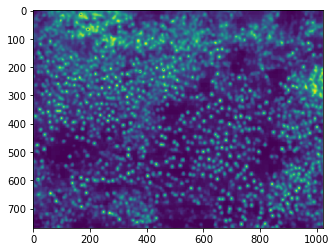

In [34]:
plt.imshow(np.uint8(np.array(pred_map.squeeze()) * 31))

In [11]:
pred_map.shape

(1, 1, 768, 1024)

In [12]:
np.sum(pred_map)/1000

1339.75375

In [25]:
(pred_map).astype(int).max()

8

In [27]:
32*8

256